In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import seaborn as sns

The dataset I have used in this project is the Cleveland Heart Disease dataset taken from the UCI repository.

In [24]:
data = pd.read_csv(r"cleveland.csv")
data.head()

,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [25]:
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

'''
cp = chest pain
trestbps = resting blood pressure
chol = Serum Cholesterol
fbs = fasting blood sugar
recg - restin0g ecg
thalach = Max heart rate achieved\
exang = exercise induced agina
oldpeak = peak exercise ST segment
'''

'\ncp = chest pain\ntrestbps = resting blood pressure\nchol = Serum Cholesterol\nfbs = fasting blood sugar\nrecg - restin0g ecg\nthalach = Max heart rate achievedexang = exercise induced agina\noldpeak = peak exercise ST segment\n'

In [26]:
data.index = np.arange(1, len(data) + 1)

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [28]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [29]:
data['ca'].fillna(data['ca'].mean(), inplace=True)
data['thal'].fillna(data['thal'].mean(), inplace=True)
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
data["sex"]  = data.sex.map({1:"Male",0:"Female"})
data["target"] = data.target.map({0:0,1:1,2:1,3:1,4:1})

In [32]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67,Male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,Male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,Male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,Female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,Male,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


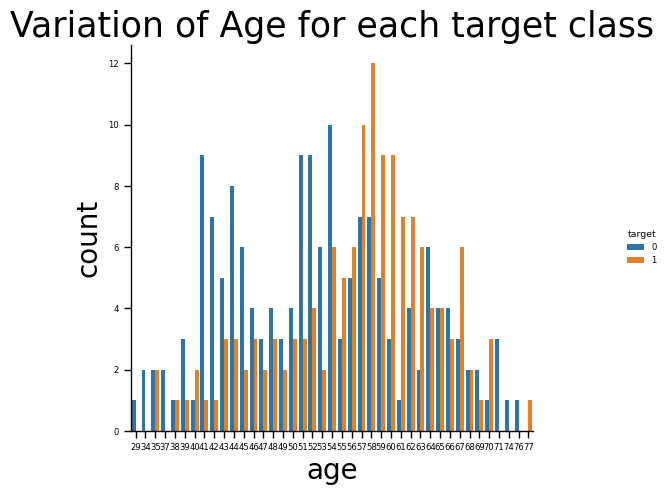

In [33]:
sns.set_context("paper", font_scale = 0.7, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})
#used this library to set up statical data visualization and specify fonts and text size 
sns.catplot(kind = 'count', data = data, x = 'age', hue = 'target', order = data['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

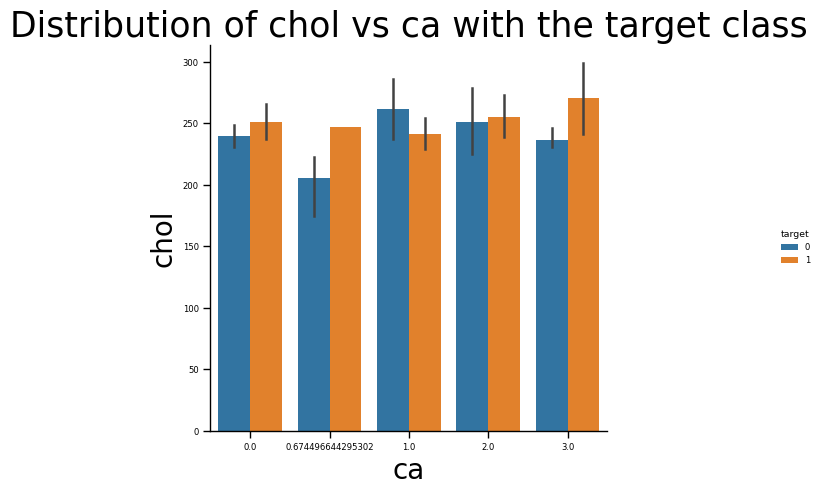

In [34]:
sns.set_context("paper", font_scale = 0.7, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})
sns.catplot(kind='bar', data=data, y='chol', x='ca', hue='target')
plt.title('Distribution of chol vs ca with the target class')
plt.show()

In [35]:
data['sex'] = data.sex.map({'female': 0, 'male': 1})

In [36]:
print(data.shape)

(302, 14)


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming data is your DataFrame
# Separate features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Check if there are missing values in features (X) and handle them
if pd.DataFrame(X).isnull().sum().any():
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(X)

# Check if there are any rows in the dataset after imputation
if X.shape[0] == 0:
    raise ValueError("The dataset has zero samples after preprocessing.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Support Vector Machine

In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for svm = 0.9087136929460581
Accuracy for test set for svm = 0.819672131147541


Naive Bayes

In [63]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Check if there are missing values in features (X) and handle them
if pd.DataFrame(X).isnull().sum().any():
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(X)

# Check if there are any rows in the dataset after imputation
if X.shape[0] == 0:
    raise ValueError("The dataset has zero samples after preprocessing.")


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8589211618257261
Accuracy for test set for Naive Bayes = 0.8360655737704918


Logistic Regression

In [60]:
import warnings
warnings.filterwarnings("ignore")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Check if there are missing values in features (X) and handle them
if pd.DataFrame(X).isnull().sum().any():
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(X)

# Check if there are any rows in the dataset after imputation
if X.shape[0] == 0:
    raise ValueError("The dataset has zero samples after preprocessing.")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8589211618257261
Accuracy for test set for Logistic Regression = 0.8688524590163934


Decision Tree

In [54]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7540983606557377


Random Forest Algorithm

In [61]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

if pd.DataFrame(X).isnull().sum().any():
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(X)
if X.shape[0] == 0:
    raise ValueError("The dataset has zero samples after preprocessing.")


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 0.995850622406639
Accuracy for test set for Random Forest = 0.8524590163934426


In [59]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.7540983606557377
